Automatically created module for IPython interactive environment


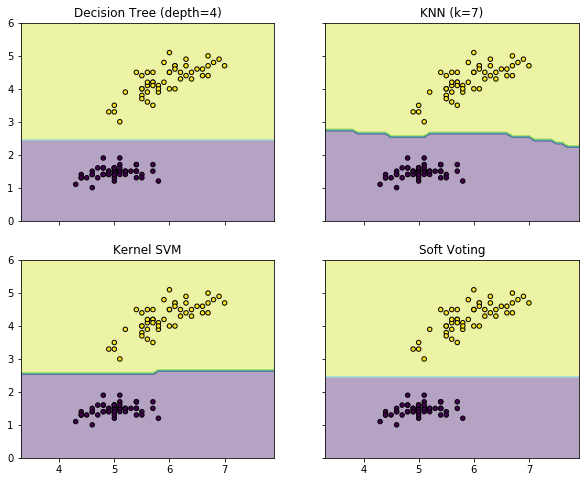

In [20]:
print(__doc__)
import warnings
warnings.filterwarnings("ignore")

from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
# Loading some example data
iris = datasets.load_iris()

from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[1:60, [0, 2]]
y = iris.target[iris.target!=2][1:60,]



# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()


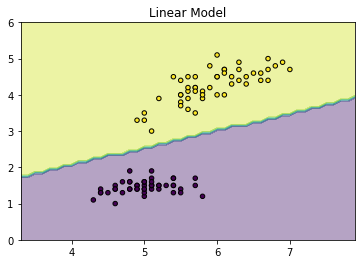

In [127]:
n=100

X = pd.Dataframe(iris.data[1:n, [0, 2]])

y = iris.target[iris.target!=2][1:n,]

# Training classifiers
clf1 = LogisticRegression()

clf1.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y,
                              s=20, edgecolor='k')
plt.title('Linear Model')

plt.show()

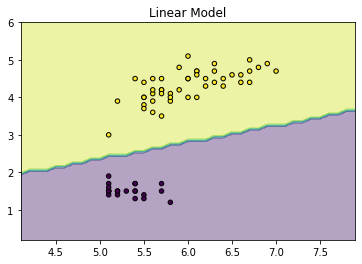

In [171]:
import pandas as pd
df = pd.DataFrame(iris.data[1:n, [0, 2]], columns=['Age','Hours'])
df['y'] = iris.target[iris.target!=2][1:n,]

y = df['y']
X =  df[['Age', 'Hours']]

# Training classifiers
clf1 = LogisticRegression()

clf1.fit(X, y)

# Plotting decision regions
x_min, x_max = X['Age'].min() - 1, X['Age'].max() + 1
y_min, y_max = X['Hours'].min() - 1, X['Hours'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X['Age'], X['Hours'], c=y,
                              s=20, edgecolor='k')
plt.title('Linear Model')

plt.show()

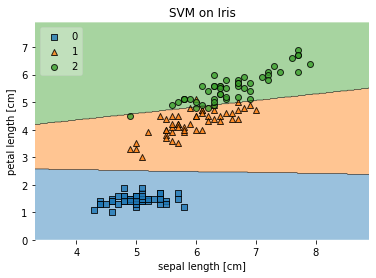

In [1]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)


# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()


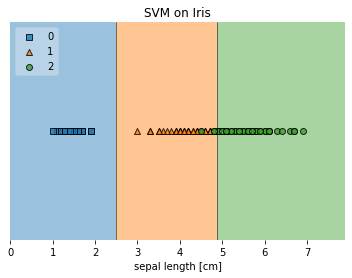

In [3]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, 2]
X = X[:, None]
y = iris.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.title('SVM on Iris')

plt.show()


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np

# Initializing Classifiers
clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='multinomial')
clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto')

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0,2]]
y = iris.target


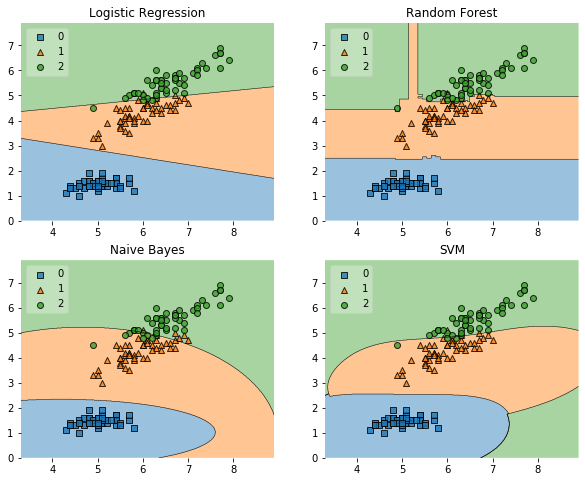

In [5]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()


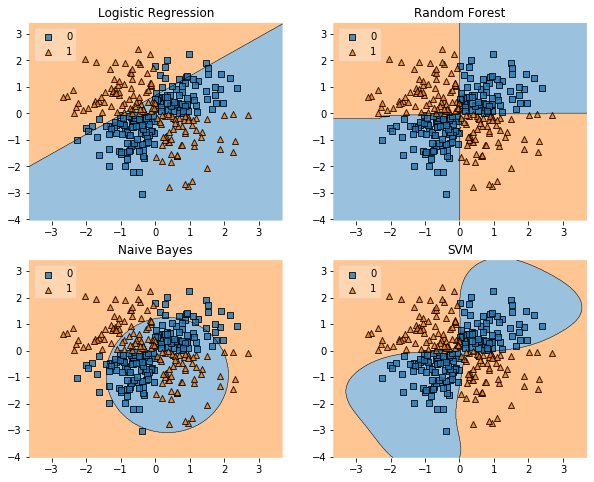

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initializing Classifiers
clf1 = LogisticRegression(random_state=1, solver='lbfgs')
clf2 = RandomForestClassifier(n_estimators=100, 
                              random_state=1)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto')
# Loading Plotting Utilities
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions
import numpy as np
xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()


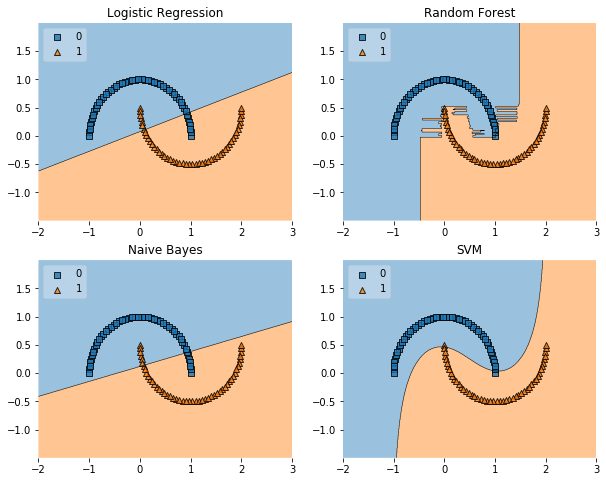

In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()


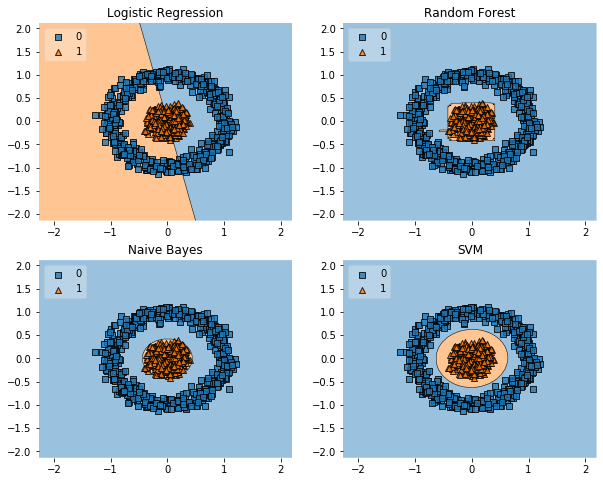

In [9]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()


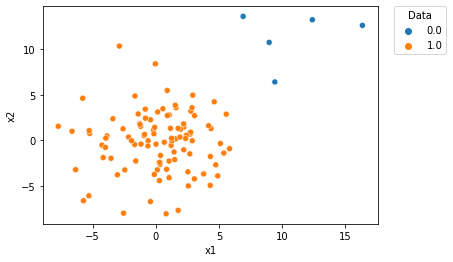

In [107]:
import pandas as pd

n0 = 5
n1 = 100

mean = [10, 10]
cov = [[10, 0], [0, 10]]  # diagonal covariance

import matplotlib.pyplot as plt
x1, x2 = np.random.multivariate_normal(mean, cov, n0).T

df1 = pd.DataFrame(np.array([x1, x2]).T, columns=['x1','x2'])
df1['y']=np.zeros(n0)

mean = [0, 0]
cov = [[10, 0], [0, 10]]  # diagonal covariance

x1, x2 = np.random.multivariate_normal(mean, cov, n1).T


df2 = pd.DataFrame(np.array([x1, x2]).T, columns=['x1','x2'])
df2['y']=np.ones(n1)

df = pd.concat([df1, df2], ignore_index=True)

X = df.drop(['y'], axis=1)
y = df.y

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="x1", y="x2", hue='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Data")


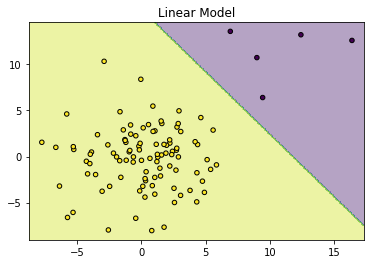

In [108]:
# Training classifiers
clf1 = LogisticRegression()

clf1.fit(X, y)

# Plotting decision regions
x_min, x_max = X['x1'].min() - 1, X['x1'].max() + 1
y_min, y_max = X['x2'].min() - 1, X['x2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X['x1'], X['x2'], c=y,
                              s=20, edgecolor='k')
plt.title('Linear Model')

plt.show()

In [109]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Create a decision tree and train
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
# Accuracry on training data
print('Training Accuracy:', model.score(x_train, y_train))

# Prediction and accuracy on testing data
y_pred = model.predict(x_test)

print('Testing Accuracy:', metrics.accuracy_score(y_pred, y_test))


Training Accuracy: 1.0
Testing Accuracy: 1.0


In [155]:
import pandas as pd

n0 = 4000
n1 = 20

clf = DecisionTreeClassifier()
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma=0.01, C=1)

mean = [10, 10]
cov = [[10, 0], [0, 10]]  # diagonal covariance

import matplotlib.pyplot as plt
x1, x2 = np.random.multivariate_normal(mean, cov, n0).T

df1 = pd.DataFrame(np.array([x1, x2]).T, columns=['x1','x2'])
df1['y']=np.zeros(n0)

mean = [0, 0]
cov = [[10, 0], [0, 10]]  # diagonal covariance

x1, x2 = np.random.multivariate_normal(mean, cov, n1).T


df2 = pd.DataFrame(np.array([x1, x2]).T, columns=['x1','x2'])
df2['y']=np.ones(n1)

df = pd.concat([df1, df2], ignore_index=True)

X = df.drop(['y'], axis=1)
y = df.y

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    
from sklearn.linear_model import LogisticRegression


clf.fit(x_train, y_train)

# db on train data
x1 = x_train['x1']
x2 = x_train['x2']

x_min, x_max = X['x1'].min() - 1, X['x1'].max() + 1
y_min, y_max = X['x2'].min() - 1, X['x2'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x1, x2, c=y_train,
                              s=20, edgecolor='k')
plt.title('SVM')

plt.show()

# db on train data
x1 = x_test['x1']
x2 = x_test['x2']

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x1, x2, c=y_test,
                              s=20, edgecolor='k')
plt.title('SVM')

plt.show()

print('Training Accuracy:', clf.score(x_train, y_train))

# Prediction and accuracy on testing data
y_pred = clf.predict(x_test)
print('Testing Accuracy:', metrics.accuracy_score(y_pred, y_test))

y_pred = clf.predict(x_train)
[tn, fp, fn, tp] = metrics.confusion_matrix(y_train, y_pred).ravel()
    
d1 = pd.DataFrame({'Data':'Train',
                    'Minority Accuracy ':[tp/(tp+fn)],
                     'Majority Accuracy ':[tn/(tn+fp)],
                      'Accuracy':[(tp+tn)/(tp+tn+fp+fn)],
                  'Average Accuracy ':[.5*(tp/(tp+fn) + tn/(tn+fp))]})  

y_pred = clf.predict(x_test)
[tn, fp, fn, tp] = metrics.confusion_matrix(y_test, y_pred).ravel()
    
d2 = pd.DataFrame({'Data':'Test',
                    'Minority Accuracy ':[tp/(tp+fn)],
                     'Majority Accuracy ':[tn/(tn+fp)],
                      'Accuracy':[(tp+tn)/(tp+tn+fp+fn)], 
                     'Average Accuracy ':[.5*(tp/(tp+fn) + tn/(tn+fp))]})  

d = pd.concat([d1, d2], ignore_index=True)

d

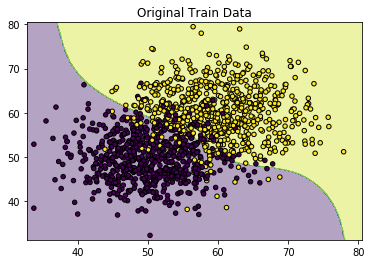

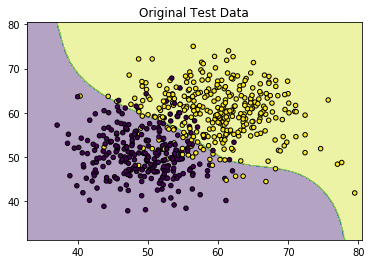

Training Accuracy: 0.8992857142857142
Testing Accuracy: 0.8916666666666667


,Data,Minority Accuracy,Majority Accuracy,Accuracy,Average Accuracy
0,Train,0.889543,0.908460,0.899286,0.899002
1,Test,0.875389,0.910394,0.891667,0.892892


In [355]:
import pandas as pd

p = 1
n = 1000

clf = DecisionTreeClassifier()
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma=0.01, C=1)

mean = [60, 60]
cov = [[40, 0], [0, 40]]  # diagonal covariance

import matplotlib.pyplot as plt
x1, x2 = np.random.multivariate_normal(mean, cov, n).T

df1 = pd.DataFrame(np.array([x1, x2]).T, columns=['x1','x2'])
df1['y']=np.ones(n)

mean = [50, 50]
cov = [[30, 0], [0, 30]]  # diagonal covariance

x1, x2 = np.random.multivariate_normal(mean, cov, n).T


df2 = pd.DataFrame(np.array([x1, x2]).T, columns=['x1','x2'])
df2['y']=np.zeros(n)

df = pd.concat([df1, df2], ignore_index=True)


df = df.drop(df.index[0:int((1-p)*n)], axis=0)

X = df.drop(['y'], axis=1)
y = df.y

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    
from sklearn.linear_model import LogisticRegression


clf.fit(x_train, y_train)

# db on train data
x1 = x_train['x1']
x2 = x_train['x2']

x_min, x_max = X['x1'].min() - 1, X['x1'].max() + 1
y_min, y_max = X['x2'].min() - 1, X['x2'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x1, x2, c=y_train,
                              s=20, edgecolor='k')
plt.title('Original Train Data')

plt.show()

# db on test data
x1 = x_test['x1']
x2 = x_test['x2']

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x1, x2, c=y_test,
                              s=20, edgecolor='k')
plt.title('Original Test Data')

plt.show()

print('Training Accuracy:', clf.score(x_train, y_train))

# Prediction and accuracy on testing data
y_pred = clf.predict(x_test)
print('Testing Accuracy:', metrics.accuracy_score(y_pred, y_test))

y_pred = clf.predict(x_train)
[tn, fp, fn, tp] = metrics.confusion_matrix(y_train, y_pred).ravel()
    
d1 = pd.DataFrame({'Data':'Train',
                    'Minority Accuracy ':[tp/(tp+fn)],
                     'Majority Accuracy ':[tn/(tn+fp)],
                      'Accuracy':[(tp+tn)/(tp+tn+fp+fn)],
                  'Average Accuracy ':[.5*(tp/(tp+fn) + tn/(tn+fp))]})  

y_pred = clf.predict(x_test)
[tn, fp, fn, tp] = metrics.confusion_matrix(y_test, y_pred).ravel()
    
d2 = pd.DataFrame({'Data':'Test',
                    'Minority Accuracy ':[tp/(tp+fn)],
                     'Majority Accuracy ':[tn/(tn+fp)],
                      'Accuracy':[(tp+tn)/(tp+tn+fp+fn)], 
                     'Average Accuracy ':[.5*(tp/(tp+fn) + tn/(tn+fp))]})  

d = pd.concat([d1, d2], ignore_index=True)

d 

# Balance Data

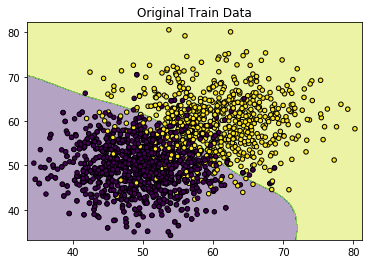

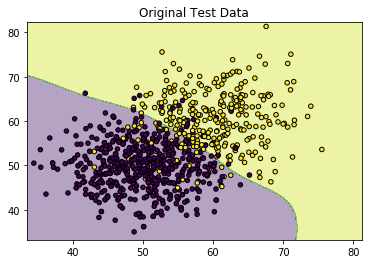

Training Accuracy: 0.8923809523809524
Testing Accuracy: 0.9088888888888889


,Data,Minority Accuracy,Majority Accuracy,Accuracy,Average Accuracy
0,Train,0.809249,0.933239,0.892381,0.871244
1,Test,0.831169,0.949324,0.908889,0.890247


In [363]:
import pandas as pd

p = .02
n = 1000

clf = DecisionTreeClassifier()
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma=0.01, C=1)

mean = [60, 60]
cov = [[40, 0], [0, 40]]  # diagonal covariance

import matplotlib.pyplot as plt
x1, x2 = np.random.multivariate_normal(mean, cov, n).T

df1 = pd.DataFrame(np.array([x1, x2]).T, columns=['x1','x2'])
df1['y']=np.ones(n)

mean = [50, 50]
cov = [[30, 0], [0, 30]]  # diagonal covariance

x1, x2 = np.random.multivariate_normal(mean, cov, n).T


df2 = pd.DataFrame(np.array([x1, x2]).T, columns=['x1','x2'])
df2['y']=np.zeros(n)

df1 = pd.concat([df1, df2], ignore_index=True)

df = pd.concat([df1, df2], ignore_index=True)

X = df.drop(['y'], axis=1)

X1 = df.drop(['y'], axis=1)

y = df.y

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    
from sklearn.linear_model import LogisticRegression


clf.fit(x_train, y_train)

# db on train data
x1 = x_train['x1']
x2 = x_train['x2']

x_min, x_max = X1['x1'].min() - 1, X1['x1'].max() + 1
y_min, y_max = X1['x2'].min() - 1, X1['x2'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x1, x2, c=y_train,
                              s=20, edgecolor='k')
plt.title('Original Train Data')

plt.show()

# db on test data
x1 = x_test['x1']
x2 = x_test['x2']

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x1, x2, c=y_test,
                              s=20, edgecolor='k')
plt.title('Original Test Data')

plt.show()

print('Training Accuracy:', clf.score(x_train, y_train))

# Prediction and accuracy on testing data
y_pred = clf.predict(x_test)
print('Testing Accuracy:', metrics.accuracy_score(y_pred, y_test))

y_pred = clf.predict(x_train)
[tn, fp, fn, tp] = metrics.confusion_matrix(y_train, y_pred).ravel()
    
d1 = pd.DataFrame({'Data':'Train',
                    'Minority Accuracy ':[tp/(tp+fn)],
                     'Majority Accuracy ':[tn/(tn+fp)],
                      'Accuracy':[(tp+tn)/(tp+tn+fp+fn)],
                  'Average Accuracy ':[.5*(tp/(tp+fn) + tn/(tn+fp))]})  

y_pred = clf.predict(x_test)
[tn, fp, fn, tp] = metrics.confusion_matrix(y_test, y_pred).ravel()
    
d2 = pd.DataFrame({'Data':'Test',
                    'Minority Accuracy ':[tp/(tp+fn)],
                     'Majority Accuracy ':[tn/(tn+fp)],
                      'Accuracy':[(tp+tn)/(tp+tn+fp+fn)], 
                     'Average Accuracy ':[.5*(tp/(tp+fn) + tn/(tn+fp))]})  

d = pd.concat([d1, d2], ignore_index=True)

d 

# Imbalanced Data

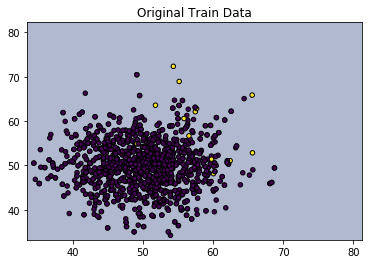

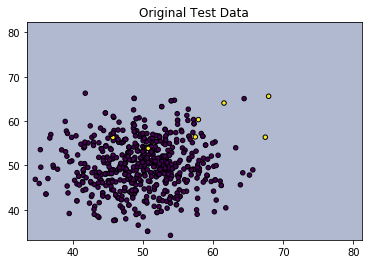

Training Accuracy: 0.9908062234794908
Testing Accuracy: 0.9884488448844885


,Data,Minority Accuracy,Majority Accuracy,Accuracy,Average Accuracy
0,Train,0.0,1.0,0.990806,0.5
1,Test,0.0,1.0,0.988449,0.5


In [364]:
df = df.drop(df.index[0:int((1-p)*n)], axis=0)

X = df.drop(['y'], axis=1)
y = df.y

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    
from sklearn.linear_model import LogisticRegression


clf.fit(x_train, y_train)

# db on train data
x1 = x_train['x1']
x2 = x_train['x2']

x_min, x_max = X1['x1'].min() - 1, X1['x1'].max() + 1
y_min, y_max = X1['x2'].min() - 1, X1['x2'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x1, x2, c=y_train,
                              s=20, edgecolor='k')
plt.title('Original Train Data')

plt.show()

# db on test data
x1 = x_test['x1']
x2 = x_test['x2']

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x1, x2, c=y_test,
                              s=20, edgecolor='k')
plt.title('Original Test Data')

plt.show()

print('Training Accuracy:', clf.score(x_train, y_train))

# Prediction and accuracy on testing data
y_pred = clf.predict(x_test)
print('Testing Accuracy:', metrics.accuracy_score(y_pred, y_test))

y_pred = clf.predict(x_train)
[tn, fp, fn, tp] = metrics.confusion_matrix(y_train, y_pred).ravel()
    
d1 = pd.DataFrame({'Data':'Train',
                    'Minority Accuracy ':[tp/(tp+fn)],
                     'Majority Accuracy ':[tn/(tn+fp)],
                      'Accuracy':[(tp+tn)/(tp+tn+fp+fn)],
                  'Average Accuracy ':[.5*(tp/(tp+fn) + tn/(tn+fp))]})  

y_pred = clf.predict(x_test)
[tn, fp, fn, tp] = metrics.confusion_matrix(y_test, y_pred).ravel()
    
d2 = pd.DataFrame({'Data':'Test',
                    'Minority Accuracy ':[tp/(tp+fn)],
                     'Majority Accuracy ':[tn/(tn+fp)],
                      'Accuracy':[(tp+tn)/(tp+tn+fp+fn)], 
                     'Average Accuracy ':[.5*(tp/(tp+fn) + tn/(tn+fp))]})  

d = pd.concat([d1, d2], ignore_index=True)

d 

# Resampled Data

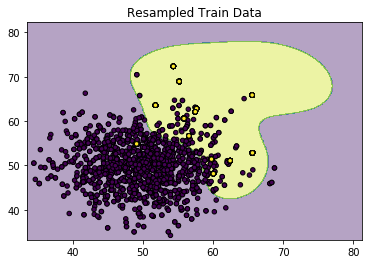

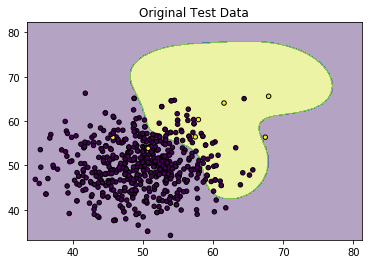

Testing Accuracy: 0.8877887788778878


,Data,Minority Accuracy,Majority Accuracy,Accuracy,Average Accuracy
0,Train,0.923077,0.892220,0.892504,0.907648
1,Test,0.571429,0.891486,0.887789,0.731457


In [365]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_res, y_res = ros.fit_resample(x_train, y_train)

df_train = pd.concat([x_train, y_train], axis=1)
df_test = pd.concat([x_test, y_test], axis=1)

df_res = pd.concat([x_res, y_res], axis=1)

# db on test data
x1 = x_res['x1']
x2 = x_res['x2']

clf.fit(x_res, y_res)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x1, x2, c=y_res,
                              s=20, edgecolor='k')
plt.title('Resampled Train Data')

plt.show()


# db on test data
x1 = x_test['x1']
x2 = x_test['x2']

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x1, x2, c=y_test,
                              s=20, edgecolor='k')
plt.title('Original Test Data')

plt.show()

# Prediction and accuracy on testing data
y_pred = clf.predict(x_test)
print('Testing Accuracy:', metrics.accuracy_score(y_pred, y_test))

y_pred = clf.predict(x_train)
[tn, fp, fn, tp] = metrics.confusion_matrix(y_train, y_pred).ravel()
    
d1 = pd.DataFrame({'Data':'Train',
                    'Minority Accuracy ':[tp/(tp+fn)],
                     'Majority Accuracy ':[tn/(tn+fp)],
                      'Accuracy':[(tp+tn)/(tp+tn+fp+fn)],
                  'Average Accuracy ':[.5*(tp/(tp+fn) + tn/(tn+fp))]})  

y_pred = clf.predict(x_test)
[tn, fp, fn, tp] = metrics.confusion_matrix(y_test, y_pred).ravel()
    
d2 = pd.DataFrame({'Data':'Test',
                    'Minority Accuracy ':[tp/(tp+fn)],
                     'Majority Accuracy ':[tn/(tn+fp)],
                      'Accuracy':[(tp+tn)/(tp+tn+fp+fn)], 
                     'Average Accuracy ':[.5*(tp/(tp+fn) + tn/(tn+fp))]})  

d = pd.concat([d1, d2], ignore_index=True)

d